In [2]:
import keras
import time
import datetime
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 400)

In [3]:
def estacao_do_ano(mes):
    if 3 <= mes <= 5:
        return 1 #'Primavera'
    elif 6 <= mes <= 8:
        return 2 #'Verão'
    elif 9 <= mes <= 11:
        return 3 #'Outono'
    else:
        return 4 #'Inverno'

In [28]:
data = pd.read_csv('total_data.csv')
data.head().T

# Não lineares inclusos: neighbourhood_cleansed, latitude, longitude, minimum_nights_avg_ntm, availability_30, availability_60, availability_90, availability_365
# review_scores, calculated_host_listings_specials, reviews_per_month (80% NaN), last_review (80% NaN)
data = data[["id", "host_id", "neighbourhood", "property_type", "room_type", "accommodates", "bathrooms", "bedrooms", "beds", "amenities", "price", "minimum_nights", "maximum_nights", "host_is_superhost", "number_of_reviews", "calculated_host_listings_count", "review_scores_rating", "reviews_per_month","availability_30","availability_60","availability_90","availability_365", "longitude", "latitude"]]

C:\Users\victor borges\AppData\Local\Temp\ipykernel_17764\3436677456.py:1: DtypeWarning: Columns (1,17,19,20,28,33,34,54,62,63,66,68,69,88) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('total_data.csv')


In [29]:
#Adicionando valor 0 aos NaN da coluna reviews_per_month
data['reviews_per_month'] = data['reviews_per_month'].fillna(0)
data['review_scores_rating'] = data['review_scores_rating'].fillna(0)
data

,id,host_id,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,host_is_superhost,number_of_reviews,calculated_host_listings_count,review_scores_rating,reviews_per_month,availability_30,availability_60,availability_90,availability_365,longitude,latitude
0,17878,68997,Copacabana,Condominium,Entire home/apt,5,1.0,2.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$307.00,4,90,f,213.0,1.0,93.0,2.16,0.0,28.0,58.0,309.0,-43.178962,-22.965919
1,24480,99249,Ipanema,Apartment,Entire home/apt,2,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",""First ...",$233.00,3,90,f,85.0,1.0,95.0,0.88,0.0,0.0,0.0,0.0,-43.201935,-22.985698
2,25026,102840,Copacabana,Apartment,Entire home/apt,3,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$159.00,4,30,f,214.0,3.0,94.0,2.15,11.0,41.0,71.0,335.0,-43.190454,-22.977117
3,31560,135635,Ipanema,Apartment,Entire home/apt,3,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$253.00,2,1125,t,215.0,1.0,96.0,2.18,0.0,13.0,26.0,173.0,-43.214270,-22.983024
4,35636,153232,Ipanema,Apartment,Entire home/apt,3,1.5,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$350.00,2,89,f,122.0,1.0,94.0,2.08,8.0,38.0,59.0,144.0,-43.193588,-22.988165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784117,43514675,15233889,Leblon,Apartment,Private room,1,1.0,1.0,1.0,"{Wifi,Kitchen,""Smoke detector"",""First aid kit""...",$55.00,2,90,f,0.0,1.0,0.0,0.00,0.0,0.0,30.0,305.0,-43.220140,-22.982870
784118,43515526,39145530,Copacabana,Apartment,Entire home/apt,6,2.5,3.0,3.0,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,E...",$653.00,1,1125,f,0.0,2.0,0.0,0.00,30.0,60.0,90.0,365.0,-43.189500,-22.977930
784119,43517044,230015819,NaN,Condominium,Private room,2,1.0,1.0,1.0,"{Wifi,Kitchen,Elevator,Washer,Essentials,Iron,...",$132.00,2,365,f,0.0,1.0,0.0,0.00,3.0,28.0,58.0,148.0,-43.361750,-22.925610
784120,43522964,4255118,Botafogo,Apartment,Entire home/apt,3,2.0,0.0,NaN,"{TV,Wifi,""Air conditioning"",Kitchen,""Free park...",$198.00,4,1125,t,0.0,49.0,0.0,0.00,25.0,55.0,85.0,174.0,-43.183550,-22.952230


In [30]:
le = LabelEncoder()
data['room_type_encoded'] = le.fit_transform(data['room_type'])
data['property_type_encoded'] = le.fit_transform(data['property_type'])
data['neighbourhood_encoded'] = le.fit_transform(data['neighbourhood'])
data['room_type_encoded'] = le.fit_transform(data['room_type'])
data['host_is_superhost_encoded'] = data['host_is_superhost'].astype('bool')
data['price'] = data['price'].replace('[\$,]', '', regex=True)
data['price'] = data['price'].astype(float)

data = data.dropna()
data

,id,host_id,neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,host_is_superhost,number_of_reviews,calculated_host_listings_count,review_scores_rating,reviews_per_month,availability_30,availability_60,availability_90,availability_365,longitude,latitude,room_type_encoded,property_type_encoded,neighbourhood_encoded,host_is_superhost_encoded
0,17878,68997,Copacabana,Condominium,Entire home/apt,5,1.0,2.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",307.0,4,90,f,213.0,1.0,93.0,2.16,0.0,28.0,58.0,309.0,-43.178962,-22.965919,1,15,24,True
1,24480,99249,Ipanema,Apartment,Entire home/apt,2,1.0,1.0,1.0,"{TV,""Cable TV"",Wifi,""Air conditioning"",""First ...",233.0,3,90,f,85.0,1.0,95.0,0.88,0.0,0.0,0.0,0.0,-43.201935,-22.985698,1,2,46,True
2,25026,102840,Copacabana,Apartment,Entire home/apt,3,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",159.0,4,30,f,214.0,3.0,94.0,2.15,11.0,41.0,71.0,335.0,-43.190454,-22.977117,1,2,24,True
3,31560,135635,Ipanema,Apartment,Entire home/apt,3,1.0,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",253.0,2,1125,t,215.0,1.0,96.0,2.18,0.0,13.0,26.0,173.0,-43.214270,-22.983024,1,2,46,True
4,35636,153232,Ipanema,Apartment,Entire home/apt,3,1.5,1.0,2.0,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",350.0,2,89,f,122.0,1.0,94.0,2.08,8.0,38.0,59.0,144.0,-43.193588,-22.988165,1,2,46,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
784114,43503051,107438406,Copacabana,Boutique hotel,Private room,4,1.0,2.0,0.0,"{TV,Wifi,""Air conditioning"",""Pets allowed"",""In...",149.0,1,1125,f,0.0,1.0,0.0,0.00,28.0,58.0,88.0,88.0,-43.191010,-22.980750,3,6,24,True
784115,43509070,68362208,Barra da Tijuca,Serviced apartment,Entire home/apt,4,1.0,1.0,2.0,"{TV,Wifi,""Air conditioning"",""Free parking on p...",335.0,2,1125,f,0.0,2.0,0.0,0.00,28.0,58.0,87.0,87.0,-43.382670,-23.010880,1,38,4,True
784116,43509482,186054159,Barra de Guaratiba,Tent,Entire home/apt,2,2.0,1.0,0.0,"{Wifi,Pool,Kitchen,""Paid parking off premises""...",140.0,1,365,f,0.0,2.0,0.0,0.00,30.0,60.0,90.0,365.0,-43.561130,-23.062040,1,39,5,True
784117,43514675,15233889,Leblon,Apartment,Private room,1,1.0,1.0,1.0,"{Wifi,Kitchen,""Smoke detector"",""First aid kit""...",55.0,2,90,f,0.0,1.0,0.0,0.00,0.0,0.0,30.0,305.0,-43.220140,-22.982870,3,2,55,True


In [31]:
data['minimum_nights'] = data['minimum_nights'].astype(int)
data['maximum_nights'] = data['maximum_nights'].astype(int)
data['accommodates'] = data['accommodates'].astype(int)
data['calculated_host_listings_count'] = data['calculated_host_listings_count'].astype(int) 

C:\Users\victor borges\AppData\Local\Temp\ipykernel_17764\919496226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['minimum_nights'] = data['minimum_nights'].astype(int)
C:\Users\victor borges\AppData\Local\Temp\ipykernel_17764\919496226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['maximum_nights'] = data['maximum_nights'].astype(int)
C:\Users\victor borges\AppData\Local\Temp\ipykernel_17764\919496226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

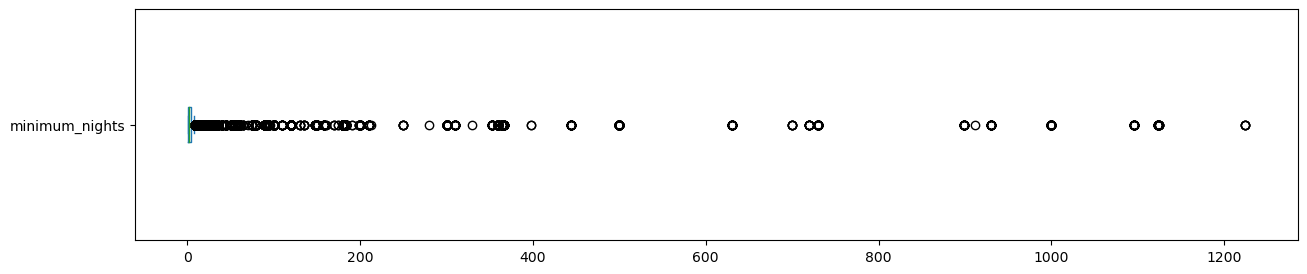


Minimo_noites: valores acima de 30:
4320 entradas
0.5921%


In [32]:
# Mínimo noites
data.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 30 dias para Mínimo noites
print("\nMinimo_noites: valores acima de 30:")
print("{} entradas".format(len(data[data.minimum_nights > 30])))
print("{:.4f}%".format((len(data[data.minimum_nights > 30]) / data.shape[0])*100))

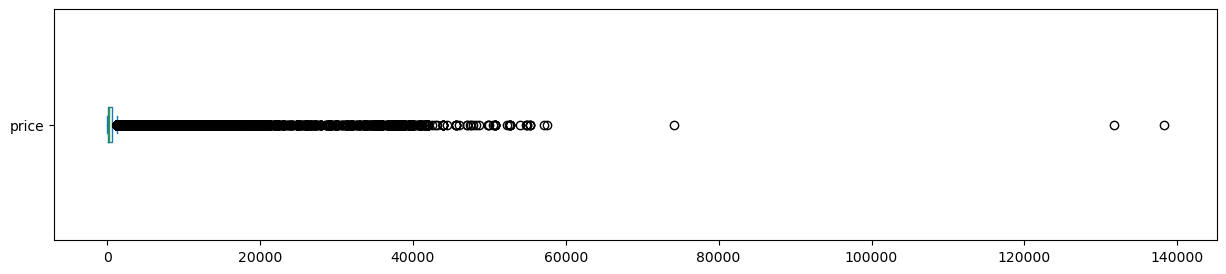


Preço: valores acima de 2500
25902 entradas
3.5504%


In [10]:
# Preço
data.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 2500 para Preço
print("\nPreço: valores acima de 2500")
print("{} entradas".format(len(data[data.price > 2500])))
print("{:.4f}%".format((len(data[data.price > 2500]) / data.shape[0])*100))

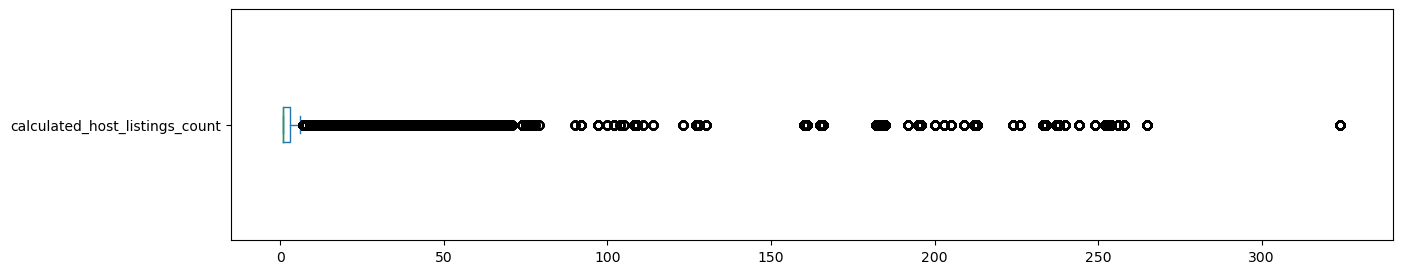

Imóveis por anfitrião: valores acima de 50
20784 entradas
2.8488%


In [11]:
# Imóveis por anfitrião
data.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de Imóveis por anfitrião acima de 50 
print("Imóveis por anfitrião: valores acima de 50")
print("{} entradas".format(len(data[data.calculated_host_listings_count > 50])))
print("{:.4f}%".format((len(data[data.calculated_host_listings_count > 50]) / data.shape[0])*100))


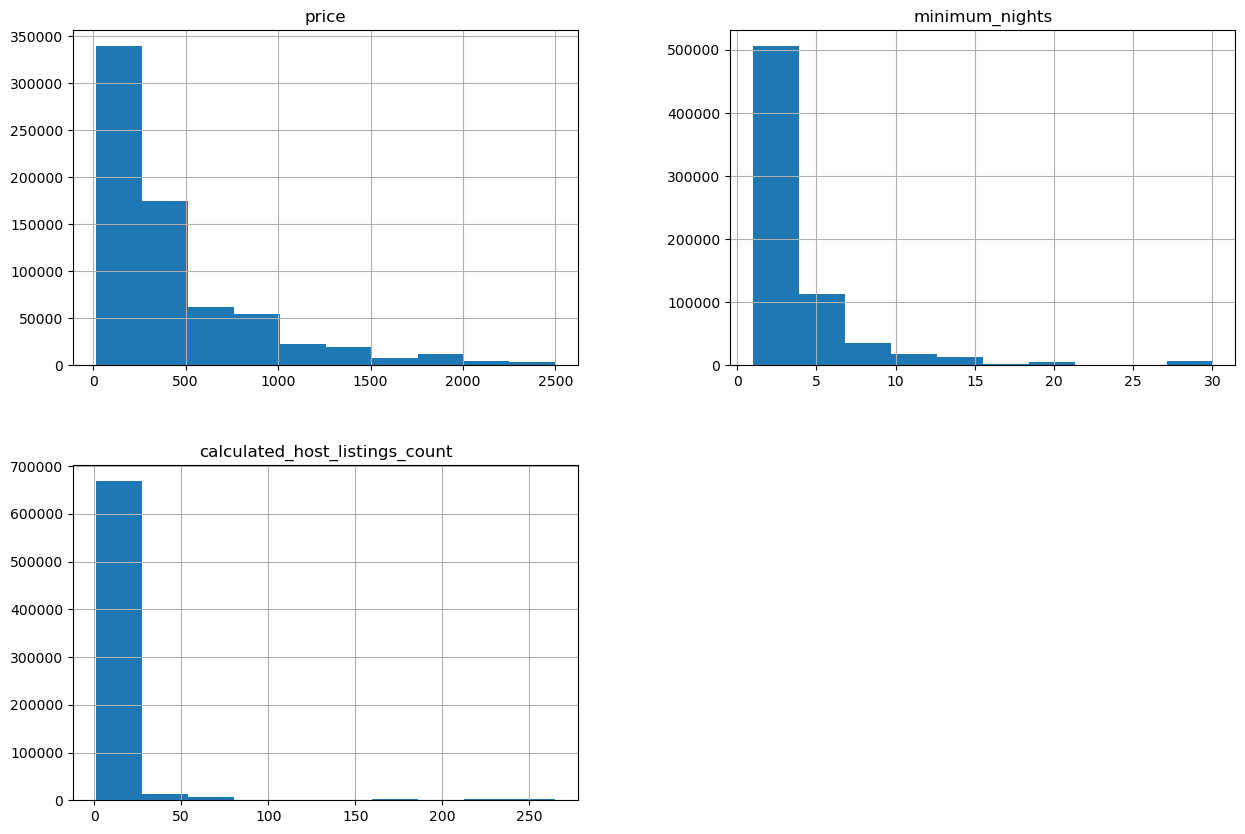

In [33]:
#Verificando e retirando valores outliers
df_clean = data.copy()
df_clean.drop(df_clean[df_clean["price"] > 2500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['minimum_nights'] > 30].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['minimum_nights'] > df_clean['maximum_nights']].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean["price"] < 10].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean["minimum_nights"] < 1].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean["calculated_host_listings_count"] < 1].index, axis=0, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean[["price", "minimum_nights", "calculated_host_listings_count"]].hist(figsize=(15,10));


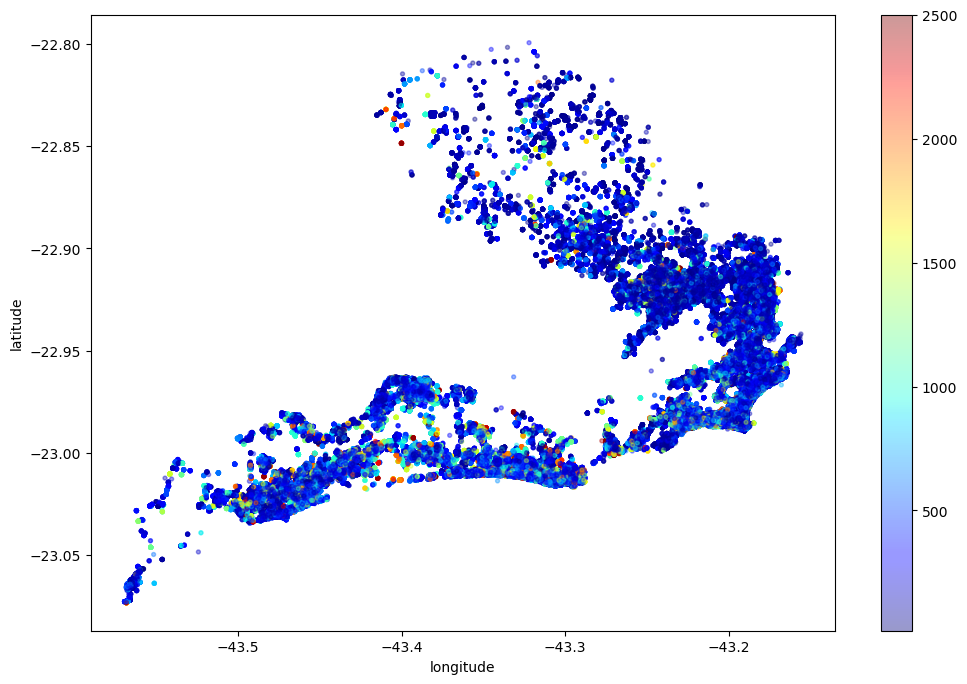

In [34]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

In [47]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', "reviews_per_month","availability_365",
    'calculated_host_listings_count',"amenities_value","accommodates","bathrooms","bedrooms","beds"	]].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,calculated_host_listings_count,amenities_value,accommodates,bathrooms,bedrooms,beds
price,1.000000,0.203023,-0.168729,-0.225338,-0.021246,-0.000154,-0.119560,0.422839,0.358905,0.485714,0.304788
minimum_nights,0.203023,1.000000,-0.087100,-0.138768,-0.028695,-0.040298,-0.062716,0.073150,0.087358,0.121273,0.042795
number_of_reviews,-0.168729,-0.087100,1.000000,0.667879,0.020384,-0.032038,0.289165,-0.012129,-0.054382,-0.072347,-0.006529
reviews_per_month,-0.225338,-0.138768,0.667879,1.000000,-0.006478,-0.024860,0.334563,-0.030462,-0.068860,-0.097836,-0.024973
availability_365,-0.021246,-0.028695,0.020384,-0.006478,1.000000,0.078768,-0.025647,0.023949,-0.000285,-0.002948,0.043665
calculated_host_listings_count,-0.000154,-0.040298,-0.032038,-0.024860,0.078768,1.000000,0.072221,0.130787,0.031100,0.077336,0.066130
amenities_value,-0.119560,-0.062716,0.289165,0.334563,-0.025647,0.072221,1.000000,0.083797,0.046906,0.068964,0.065042
accommodates,0.422839,0.073150,-0.012129,-0.030462,0.023949,0.130787,0.083797,1.000000,0.458016,0.683741,0.737295
bathrooms,0.358905,0.087358,-0.054382,-0.068860,-0.000285,0.031100,0.046906,0.458016,1.000000,0.541422,0.421605
bedrooms,0.485714,0.121273,-0.072347,-0.097836,-0.002948,0.077336,0.068964,0.683741,0.541422,1.000000,0.604719


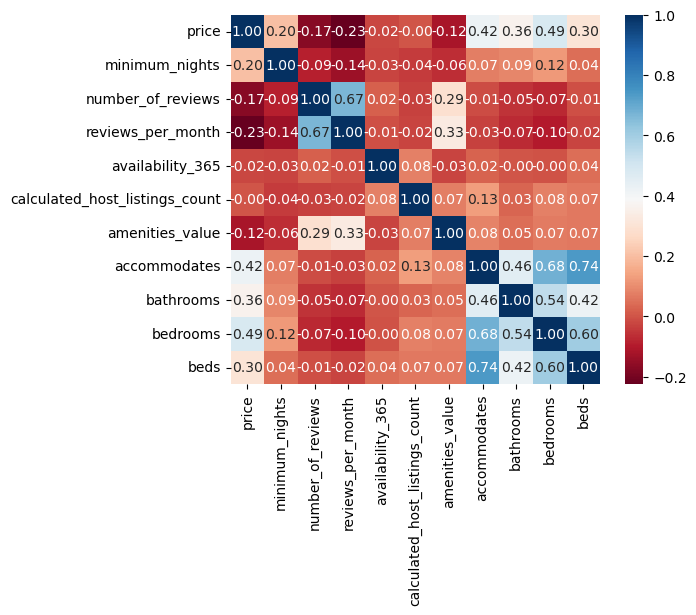

In [48]:

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

In [14]:
df_clean.property_type.value_counts()

property_type
Apartment                 555896
House                      55366
Condominium                33049
Serviced apartment         16530
Loft                       13172
Bed and breakfast           4669
Hostel                      3892
Guest suite                 3743
Guesthouse                  2299
Other                       2169
Villa                       1525
Townhouse                   1242
Aparthotel                  1240
Hotel                       1118
Boutique hotel               703
Chalet                       453
Earth house                  416
Tiny house                   409
Cottage                      282
Casa particular (Cuba)       250
Bungalow                     198
Boat                         177
Nature lodge                 118
Cabin                         89
Castle                        89
Campsite                      56
Island                        50
Treehouse                     45
Resort                        31
Camper/RV                    

In [107]:
amenities = (data['amenities'].str.strip('{}').str.get_dummies(',').rename(columns= lambda x: x.strip('"')))
dataAmenities = pd.DataFrame(data['price']).join(amenities)

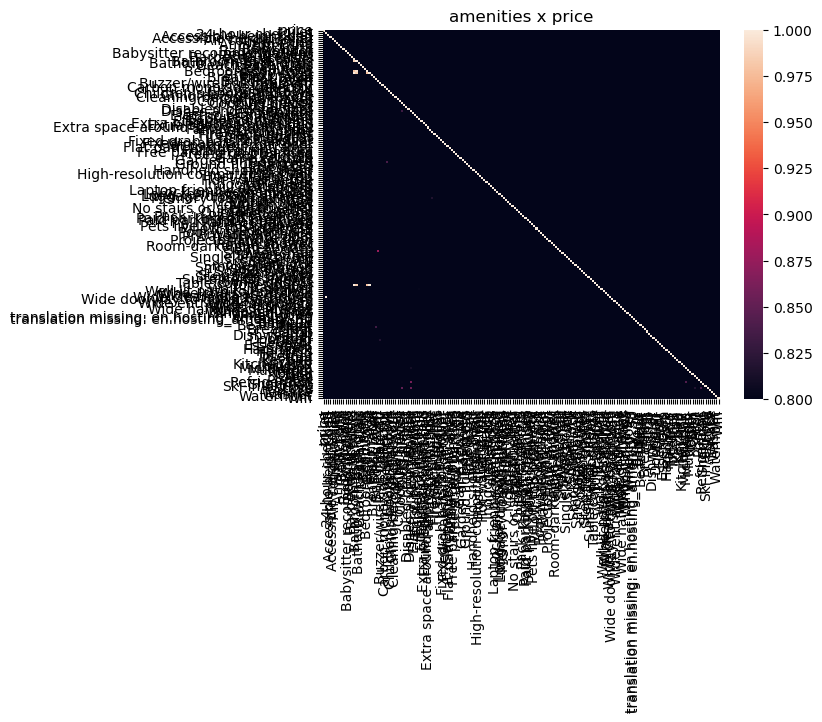

In [9]:
aCorr = dataAmenities.corr()
labels = aCorr.columns.values

aCorr = np.tril(aCorr)
val_min = 0.8
val_max = 1

# cols
ind_x, = np.where(np.all(np.logical_or(aCorr<val_min, aCorr>val_max), axis=0))
aCorr = np.delete(aCorr, ind_x, 1)
map_labels_x = [item for i, item in enumerate(labels) if i not in ind_x]

#rows
ind_y, = np.where(np.all(np.logical_or(aCorr<val_min, aCorr>val_max), axis=1))
aCorr = np.delete(aCorr, ind_y, 0)
map_labels_y = [item for i, item in enumerate(labels) if i not in ind_y]

hm = sns.heatmap(aCorr, xticklabels=map_labels_x, yticklabels=map_labels_y, vmin=val_min, vmax=val_max)
hm.set_title("amenities x price")
plt.show()

In [41]:
amenities_values = {
    "TV": 10, "Cable TV": 20, "Internet": 30, "Wifi": 40, "Air conditioning": 50, "Wheelchair accessible": 60, "Kitchen": 70, "Free parking on premises": 80,
    "Pets allowed": 90, "Doorman": 100, "Elevator": 110, "Buzzer/wireless intercom": 120, "Family/kid friendly": 130, "Washer": 140, "Dryer": 150, "Smoke detector": 160,
    "Carbon monoxide detector": 170, "First aid kit": 180, "Fire extinguisher": 190, "Essentials": 200, "Shampoo": 210, "Lock on bedroom door": 220, "24-hour check-in": 230,
    "Hangers": 240, "Hair dryer": 250, "Iron": 260, "Laptop friendly workspace": 270, "Self check-in": 280, "Building staff": 290, "Private living room": 300, "Window guards": 310,
    "Room-darkening shades": 320, "Hot water": 330, "Body soap": 340, "Bath towel": 350, "Toilet paper": 360, "Bed linens": 370, "Extra pillows and blankets": 380,
    "Ethernet connection": 390, "Pocket wifi": 400, "Coffee maker": 410, "Refrigerator": 420, "Dishes and silverware": 430, "Cooking basics": 440, "Oven": 450,
    "Stove": 460, "Single level home": 470, "Patio or balcony": 480, "Garden or backyard": 490, "Beach essentials": 500, "Luggage dropoff allowed": 510,
    "Long term stays allowed": 520, "Wide hallways": 530, "No stairs or steps to enter": 540, "Flat path to guest entrance": 550,
    "Well-lit path to entrance": 560, "Wide doorway to guest bathroom": 570, "Wide entryway": 580, "Mini fridge": 590, "Smart TV": 600, "DVD player": 610,
    "Rain shower": 620, "Sound system": 630, "Gas oven": 640, "Printer": 650, "Breakfast table": 660, "Espresso machine": 670, "Convection oven": 680,
    "Netflix": 690, "Memory foam mattress": 700, "Fax machine": 710, "Wine cooler": 720, "En suite bathroom": 730, "Walk-in shower": 740,
    "Bedroom comforts": 750, "Bathroom essentials": 760
}

def calculate_amenities_value(amenities_str):
    amenities = amenities_str[1:-1].split(',')
    return sum(amenities_values.get(amenity, 0) for amenity in amenities)

df_clean['amenities'] = data['amenities'].astype(str)
df_clean['amenities_value'] = data['amenities'].apply(calculate_amenities_value)

In [43]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', "reviews_per_month","availability_30",
                 "availability_60","availability_90","availability_365",'calculated_host_listings_count',
                 "amenities_value"]].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_30,availability_60,availability_90,availability_365,calculated_host_listings_count,amenities_value
price,1.000000,0.203023,-0.168729,-0.225338,0.001227,-0.014759,-0.027420,-0.021246,-0.000154,-0.119560
minimum_nights,0.203023,1.000000,-0.087100,-0.138768,-0.010908,-0.012982,-0.016416,-0.028695,-0.040298,-0.062716
number_of_reviews,-0.168729,-0.087100,1.000000,0.667879,-0.072226,-0.044914,-0.021570,0.020384,-0.032038,0.289165
reviews_per_month,-0.225338,-0.138768,0.667879,1.000000,-0.060377,-0.026701,-0.000703,-0.006478,-0.024860,0.334563
availability_30,0.001227,-0.010908,-0.072226,-0.060377,1.000000,0.969488,0.940116,0.710623,0.049242,-0.062007
availability_60,-0.014759,-0.012982,-0.044914,-0.026701,0.969488,1.000000,0.986751,0.748681,0.055537,-0.035331
availability_90,-0.027420,-0.016416,-0.021570,-0.000703,0.940116,0.986751,1.000000,0.772710,0.059183,-0.016058
availability_365,-0.021246,-0.028695,0.020384,-0.006478,0.710623,0.748681,0.772710,1.000000,0.078768,-0.025647
calculated_host_listings_count,-0.000154,-0.040298,-0.032038,-0.024860,0.049242,0.055537,0.059183,0.078768,1.000000,0.072221
amenities_value,-0.119560,-0.062716,0.289165,0.334563,-0.062007,-0.035331,-0.016058,-0.025647,0.072221,1.000000


,price,minimum_nights,number_of_reviews,reviews_per_month,availability_30,availability_60,availability_90,availability_365,calculated_host_listings_count,amenities_value
price,1.000000,0.203023,-0.168729,-0.225338,0.001227,-0.014759,-0.027420,-0.021246,-0.000154,-0.119560
minimum_nights,0.203023,1.000000,-0.087100,-0.138768,-0.010908,-0.012982,-0.016416,-0.028695,-0.040298,-0.062716
number_of_reviews,-0.168729,-0.087100,1.000000,0.667879,-0.072226,-0.044914,-0.021570,0.020384,-0.032038,0.289165
reviews_per_month,-0.225338,-0.138768,0.667879,1.000000,-0.060377,-0.026701,-0.000703,-0.006478,-0.024860,0.334563
availability_30,0.001227,-0.010908,-0.072226,-0.060377,1.000000,0.969488,0.940116,0.710623,0.049242,-0.062007
availability_60,-0.014759,-0.012982,-0.044914,-0.026701,0.969488,1.000000,0.986751,0.748681,0.055537,-0.035331
availability_90,-0.027420,-0.016416,-0.021570,-0.000703,0.940116,0.986751,1.000000,0.772710,0.059183,-0.016058
availability_365,-0.021246,-0.028695,0.020384,-0.006478,0.710623,0.748681,0.772710,1.000000,0.078768,-0.025647
calculated_host_listings_count,-0.000154,-0.040298,-0.032038,-0.024860,0.049242,0.055537,0.059183,0.078768,1.000000,0.072221
amenities_value,-0.119560,-0.062716,0.289165,0.334563,-0.062007,-0.035331,-0.016058,-0.025647,0.072221,1.000000


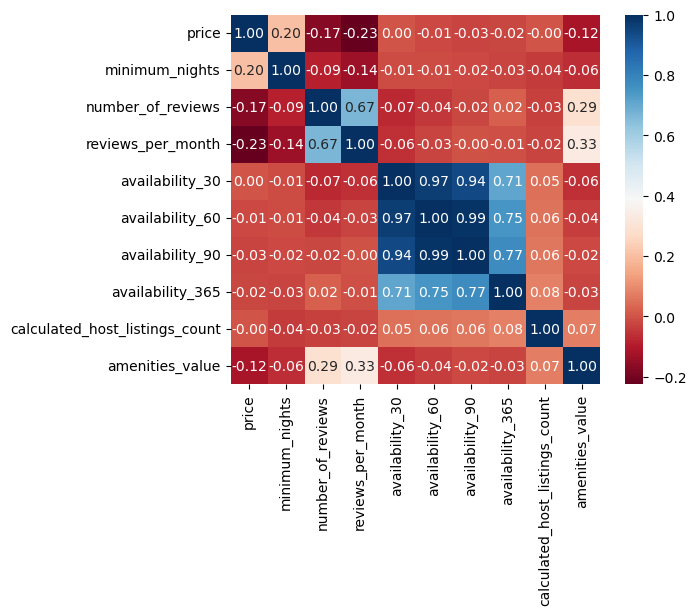

In [42]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

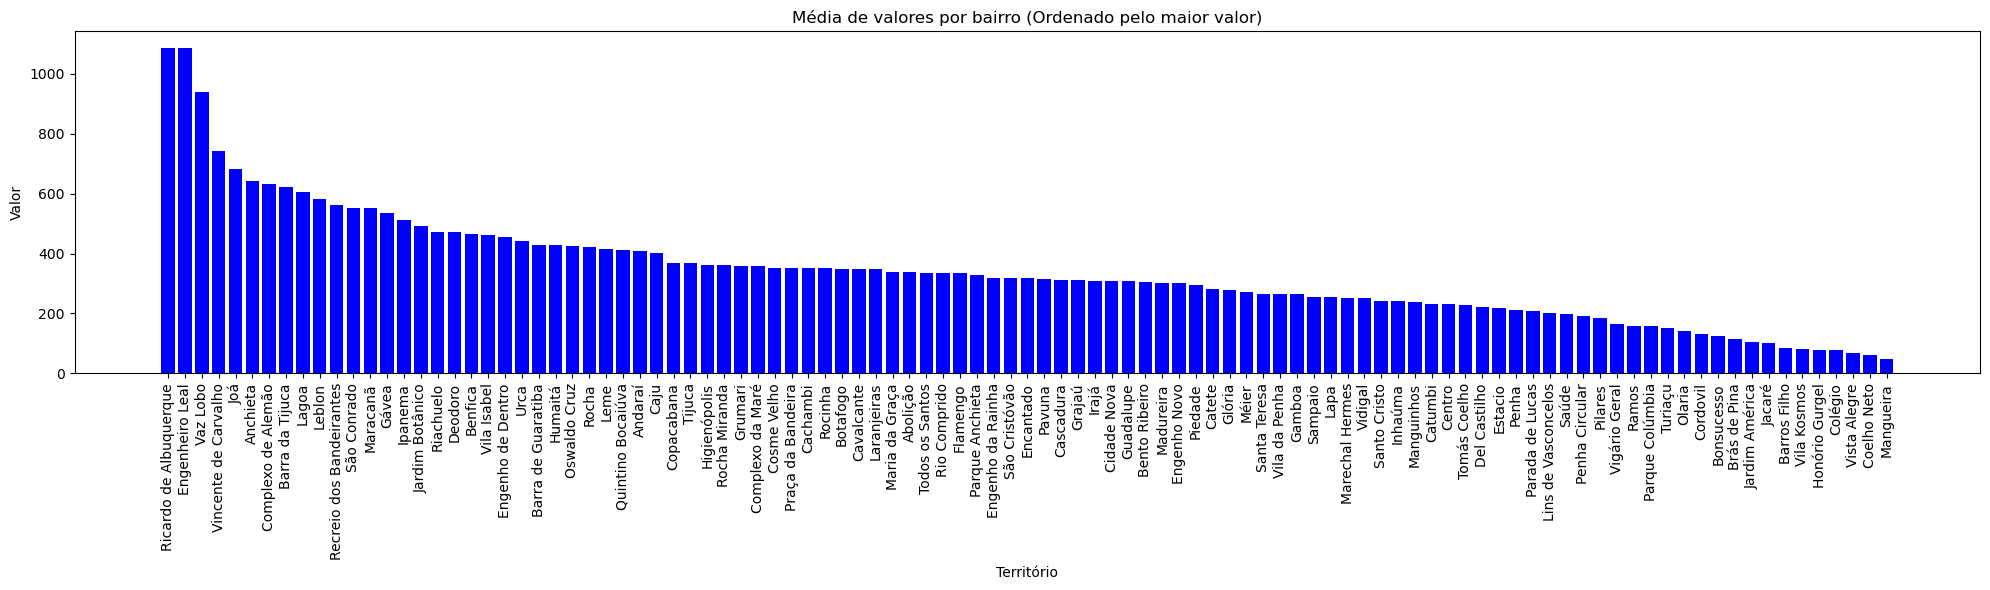

In [112]:
media_por_bairro = df_clean.groupby('neighbourhood').price.mean()
# Ordene os dados pelo valor em ordem decrescente
media_por_bairro = media_por_bairro.sort_values(ascending=False)

# Defina os dados do DataFrame como valores para o gráfico
territorios = media_por_bairro.index
valores = media_por_bairro

# Crie o gráfico de barras
plt.figure(figsize=(20, 6))
plt.bar(territorios, valores, color='blue')
plt.xlabel('Território')
plt.ylabel('Valor')
plt.title('Média de valores por bairro (Ordenado pelo maior valor)')
plt.xticks(rotation=90)  # RotacioAAAna os rótulos dos territórios para melhor legibilidade
plt.tight_layout()

# Exiba o gráfico
plt.show()

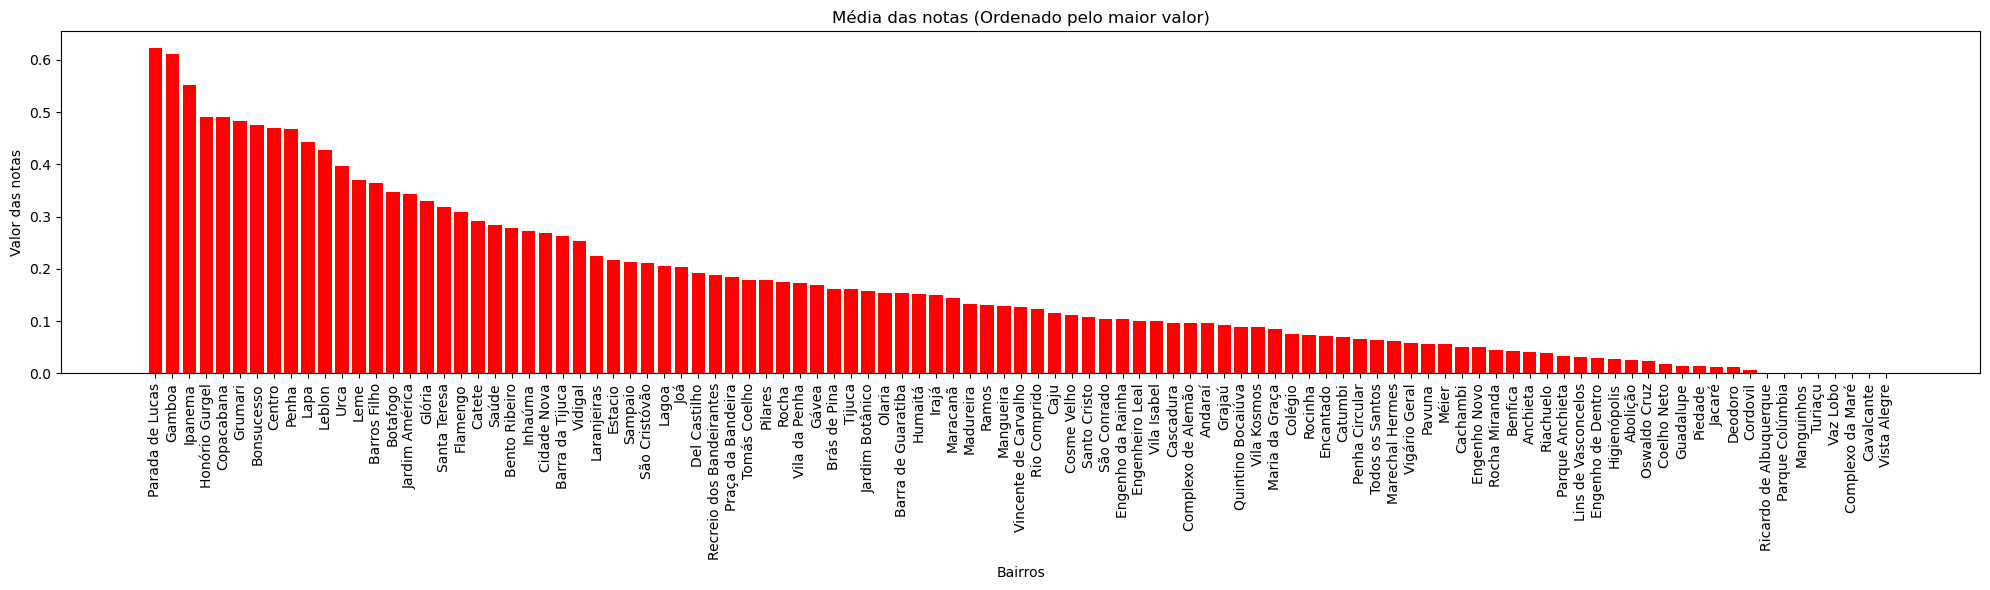

In [93]:
media_por_bairro = data.groupby('neighbourhood').review_scores_rating.mean()
media_por_bairro = media_por_bairro.sort_values(ascending=False)
territorios = media_por_bairro.index
valores = media_por_bairro
plt.figure(figsize=(20, 6))
plt.bar(territorios, valores, color='red')
plt.xlabel('Bairros')
plt.ylabel('Valor das notas')
plt.title('Média das notas (Ordenado pelo maior valor)')
plt.xticks(rotation=90)  # Rotaciona os rótulos dos territórios para melhor legibilidade
plt.tight_layout()

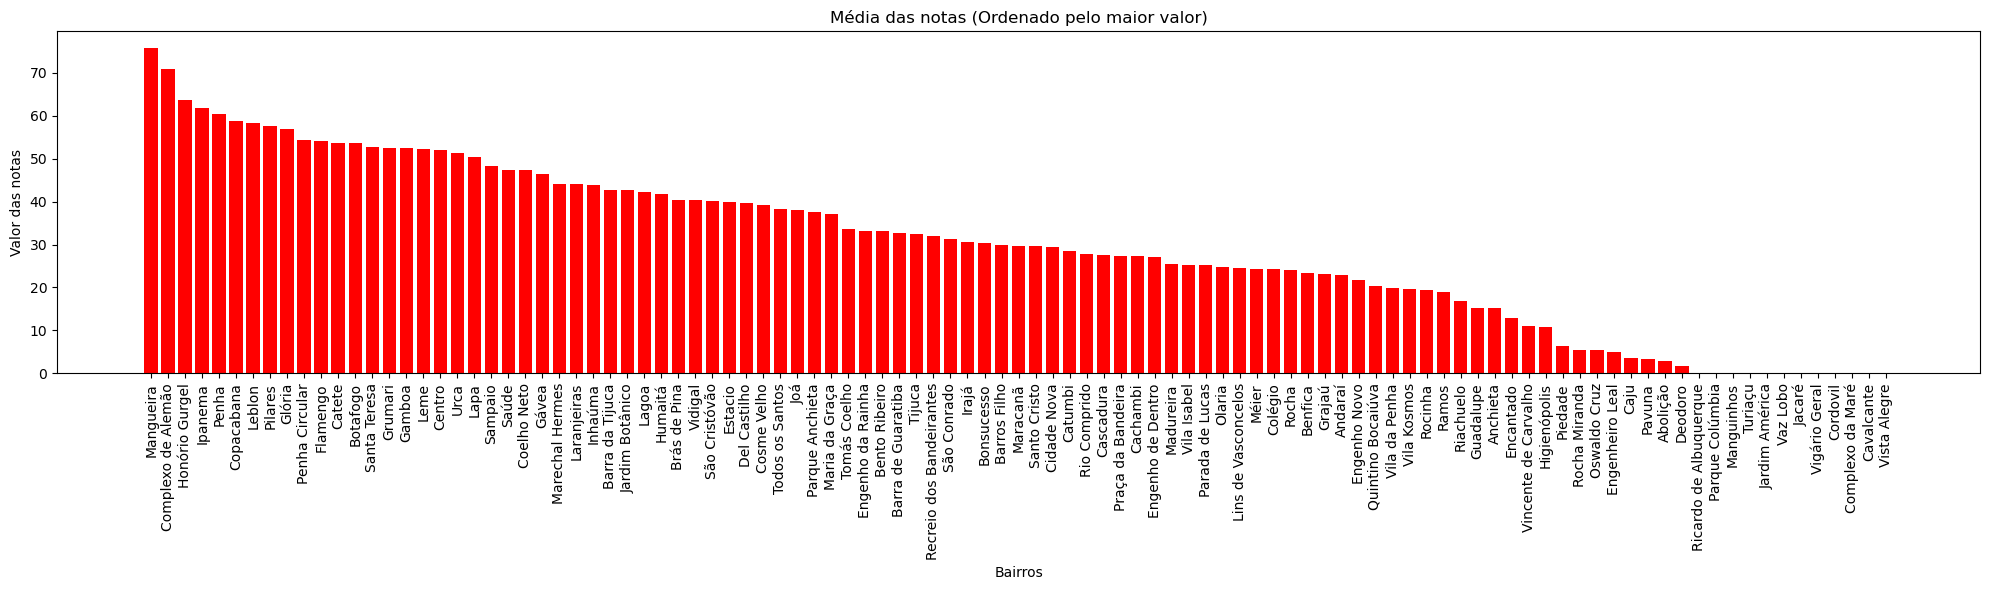

In [110]:
media_por_bairro = data.groupby('neighbourhood').review_scores_rating.mean()
media_por_bairro = media_por_bairro.sort_values(ascending=False)
territorios = media_por_bairro.index
valores = media_por_bairro
plt.figure(figsize=(20, 6))
plt.bar(territorios, valores, color='red')
plt.xlabel('Bairros')
plt.ylabel('Valor das notas')
plt.title('Média das notas (Ordenado pelo maior valor)')
plt.xticks(rotation=90)  # Rotaciona os rótulos dos territórios para melhor legibilidade
plt.tight_layout()

In [22]:
data.columns

Index(['id', 'host_id', 'neighbourhood', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'host_is_superhost',
       'number_of_reviews', 'calculated_host_listings_count',
       'review_scores_rating', 'reviews_per_month', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'room_type_encoded', 'property_type_encoded', 'neighbourhood_encoded',
       'host_is_superhost_encoded'],
      dtype='object')

In [25]:
df_clean2 = data.drop('price', axis=1).drop('property_type', axis=1).drop('room_type', axis=1).drop('neighbourhood', axis=1).drop('id', axis=1).drop('host_id', axis=1).drop('amenities', axis=1).values

df_clean2 = pd.DataFrame(df_clean2)

corr_matrix = df_clean2.corr()

# Crie um heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'f'

In [12]:
features = (data.drop('price', axis=1).drop('property_type', axis=1).drop('room_type', axis=1).drop('neighbourhood', axis=1)
            .drop('has_availability', axis=1).drop('host_identity_verified', axis=1).drop('id', axis=1).drop('host_id', axis=1).drop('amenities', axis=1).values)
prediction = data['price'].values

In [13]:
x_train, x_test, y_train, y_test = train_test_split(features, prediction, test_size=0.33, random_state=6969)
ss = StandardScaler()
x_train = ss.fit_transform(x_train.astype(float))
x_test = ss.transform(x_test.astype(float))

ValueError: could not convert string to float: 'f'

In [10]:
inputs = keras.Input(shape=(15,))
outputs = keras.layers.Dense(1)(inputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer=keras.optimizers.Nadam(), loss=[keras.losses.MeanSquaredError()], metrics=[keras.metrics.MeanAbsoluteError()])

start_time = time.time()
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))
print("--- %s minutes ---" % datetime.timedelta(seconds=(time.time() - start_time)))
model.summary()

Epoch 1/100
8410/8410 [==============================] - 9s 986us/step - loss: 851945.6250 - mean_absolute_error: 369.3804 - val_loss: 913675.3125 - val_mean_absolute_error: 364.6725
Epoch 2/100
8410/8410 [==============================] - 8s 985us/step - loss: 836664.2500 - mean_absolute_error: 361.7208 - val_loss: 899363.1250 - val_mean_absolute_error: 357.1780
Epoch 3/100
8410/8410 [==============================] - 8s 986us/step - loss: 822785.8750 - mean_absolute_error: 354.2943 - val_loss: 886157.0000 - val_mean_absolute_error: 349.8793
Epoch 4/100
8410/8410 [==============================] - 8s 1ms/step - loss: 810174.2500 - mean_absolute_error: 347.0094 - val_loss: 874356.5000 - val_mean_absolute_error: 342.7719
Epoch 5/100
8410/8410 [==============================] - 8s 987us/step - loss: 798667.8125 - mean_absolute_error: 339.9325 - val_loss: 863517.0000 - val_mean_absolute_error: 335.8761
Epoch 6/100
8410/8410 [==============================] - 8s 978us/step - loss: 788138.8

In [11]:
model.predict(x_test)

4142/4142 [==============================] - 2s 562us/step


array([[170.40196 ],
       [819.4298  ],
       [250.97958 ],
       ...,
       [ 80.27515 ],
       [ 89.650024],
       [172.06879 ]], dtype=float32)

In [12]:
y_test

array([228., 600., 122., ...,  80., 131., 312.])

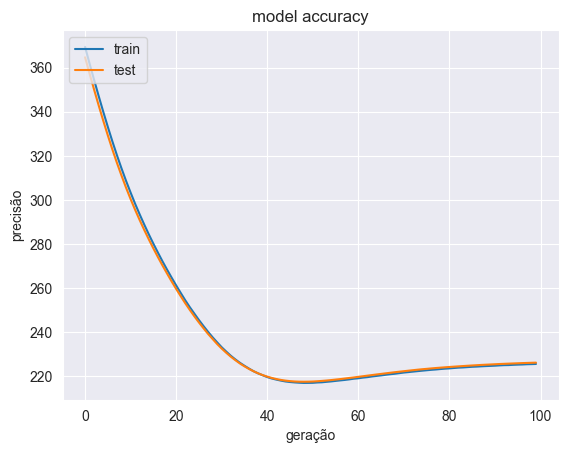

In [13]:
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('precisão')
plt.xlabel('geração')
plt.legend(['train', 'test'], loc='upper left')

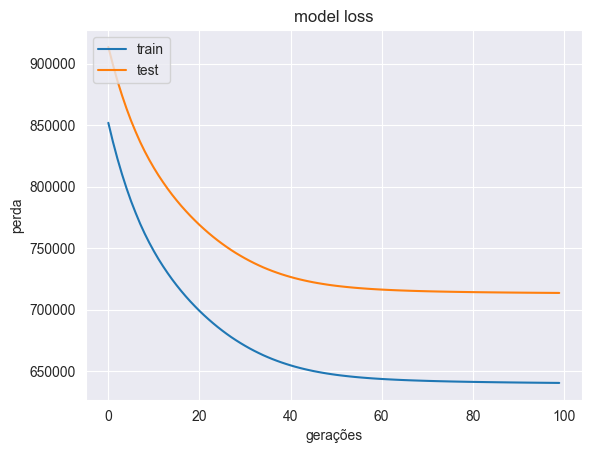

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('perda')
plt.xlabel('gerações')
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
y_test
model.predict(x_test)